In [1]:
from sentence_transformers import SentenceTransformer
import networkx as nx
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import community as community_louvain  # Louvain algorithm
import matplotlib.pyplot as plt
import community as community_louvain
from collections import defaultdict
import pandas as pd

In [2]:
#From Hugging Face
# Load pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')  # lightweight and powerful

In [3]:
# Load the network
import pickle

# Load the pickle file
with open('../ready_networks/ds_network.pkl', 'rb') as f:
    G = pickle.load(f)

# Get the hashtags (nodes)
hashtags = list(G.nodes)

In [ ]:
# Embed hashtags
embeddings = model.encode(hashtags)
print(embeddings.shape) #480 hashtags / each is represented by a 384-dimension vector


(4195, 384)


In [5]:
# Calculate the embedding similarities
similarities = model.similarity(embeddings, embeddings)
print(similarities)

tensor([[1.0000, 0.2876, 0.2347,  ..., 0.1588, 0.2305, 0.2314],
        [0.2876, 1.0000, 0.2898,  ..., 0.1557, 0.2229, 0.2935],
        [0.2347, 0.2898, 1.0000,  ..., 0.0995, 0.1125, 0.1086],
        ...,
        [0.1588, 0.1557, 0.0995,  ..., 1.0000, 0.2829, 0.2366],
        [0.2305, 0.2229, 0.1125,  ..., 0.2829, 1.0000, 0.2952],
        [0.2314, 0.2935, 0.1086,  ..., 0.2366, 0.2952, 1.0000]])


In [6]:
#cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings)

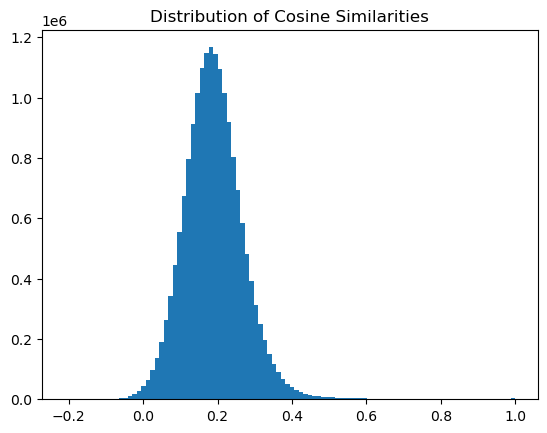

In [7]:
#have to plot a histogram to see the curt-off
import matplotlib.pyplot as plt

# similarities is your 480 x 480 cosine similarity matrix (flattened)
plt.hist(similarities.flatten(), bins=100)
plt.title('Distribution of Cosine Similarities')
plt.show()

In [8]:
# Graph
G = nx.Graph()
for i in range(len(hashtags)):
    G.add_node(hashtags[i])
    for j in range(i+1, len(hashtags)):
        if similarity_matrix[i, j] > 0.2:  # Threshold to create an edge - look at histogram
            G.add_edge(hashtags[i], hashtags[j], weight=similarity_matrix[i, j])

In [9]:
# Cluster with Louvain
partition = community_louvain.best_partition(G, weight='weight')

In [10]:
# Save graph to a pickle file
with open('S_R_ds.pkl', 'wb') as f:
    pickle.dump(G, f)